# Олон ангилалын загвар

## Сангуудаа импортлох

In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from keras.optimizers import Adam
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LeakyReLU, BatchNormalization, MaxPooling1D, Dropout
from keras.utils import to_categorical

## Өгөгдлөө унших

In [3]:
dataset = pd.read_csv('../../input/augmented_data/spectrum.csv', low_memory=False)

## Өгөгдлөө шалгах

In [4]:
display(dataset.head().T, dataset.shape)

,0,1,2,3,4
320,23.767617,6.554332,-65.876227,-3.539452,-32.211329
321,8.541673,-3.982771,-52.107447,-25.36141,3.569451
322,-6.737708,-12.508809,-43.797257,-22.890028,-25.360113
323,-13.844851,-14.161707,-34.973131,-15.633461,-24.382165
324,-15.338898,-11.528857,-24.758405,-24.196508,-13.837212
...,...,...,...,...,...
classfication,0,0,0,0,0
negpos,0,0,0,0,0
medium,NaN,NaN,NaN,NaN,NaN
mediumclassification,NaN,NaN,NaN,NaN,NaN


(6400, 1338)

In [112]:
diagnosis_map = {
    0 : 'blank',
    1 : 'S protein',
    2 : 'VLP protein',
    3 : 'VLP protein untreated saliva',
    4 : 'Streptavidin',
}

covid_status_map = {
    0 : 'Negative',
    1 : 'Positive'
}

## Өгөгдлөө бэлдэх

In [97]:
def data_preprocessing(data):
    labels = data.columns[-7:]
    X = data.drop(labels, axis=1)
    X.columns = X.columns.astype(int)
    y = data['classfication'].values
    
    y = to_categorical(y, num_classes=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

    return X_train, X_test, y_train, y_test

In [98]:
X_train, X_test, y_train, y_test = data_preprocessing(dataset)

In [99]:
y_train.shape, y_test.shape

((4800, 5), (1600, 5))

In [138]:
NUM_EPOCHS = 50

In [139]:
def leNet1D(X_train, X_test, y_train, y_test, num_epochs=NUM_EPOCHS, num_classes=5):

    lenet = Sequential([
        Conv1D(16, 21, input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),
        LeakyReLU(0.01),
        MaxPooling1D(16),

        Conv1D(32, 11),
        BatchNormalization(),
        LeakyReLU(0.01),
        MaxPooling1D(8),

        Conv1D(64, 5),
        BatchNormalization(),
        LeakyReLU(0.01),
        MaxPooling1D(4),
        
        Flatten(),
        BatchNormalization(),
        Dropout(0.5),

        Dense(512, activation='tanh'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.0002)

    lenet.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []
    for i in range(num_epochs):
        history = lenet.fit(X_train, y_train, epochs=1, batch_size=8, verbose=0)
        
        train_loss.append(history.history['loss'][0])
        train_accuracy.append(history.history['accuracy'][0])

        loss, accuracy = lenet.evaluate(X_test, y_test, verbose=0)

        test_loss.append(loss)
        test_accuracy.append(accuracy)
        if (i + 1) % 5 == 0:
            print(f'Epoch {i+1} => Test Loss: {loss:.2f} - Test Accuracy: {accuracy*100:.2f}%')

    plt.figure(figsize=(15, 8))
    plt.plot(train_loss, label='Train loss')
    plt.plot(test_loss, label='Test loss')
    # fig, axs = plt.subplots(ncols=2)
    # axs[0].plot(train_accuracy, ax=axs[0], label='train acc')
    # axs[0].plot(test_accuracy, ax=axs[0], label='test acc')
    # axs[0].set_xlabel('Epoch')
    # axs[0].set_ylabel('Accuracy')
    # axs[0].set_title('Model accuracy')

    # axs[1].plot(train_loss, ax=axs[1], label='train loss')
    # axs[1].plot(test_loss, ax=axs[1], label='test loss')
    # axs[1].set_xlabel('Epoch')
    # axs[1].set_ylabel('Accuracy')
    # axs[1].set_title('Model accuracy')

    # plt.tight_layout()
    plt.show()

    return lenet

In [134]:
leNet = leNet1D(X_train, X_test, y_train, y_test)

Epoch 5 => Test Loss: 0.10 - Test Accuracy: 95.38%
Epoch 10 => Test Loss: 0.08 - Test Accuracy: 96.06%
Epoch 15 => Test Loss: 0.09 - Test Accuracy: 95.25%
Epoch 20 => Test Loss: 0.08 - Test Accuracy: 95.63%
Epoch 25 => Test Loss: 0.07 - Test Accuracy: 95.56%
Epoch 30 => Test Loss: 0.07 - Test Accuracy: 95.56%
Epoch 35 => Test Loss: 0.07 - Test Accuracy: 95.13%
Epoch 40 => Test Loss: 0.08 - Test Accuracy: 95.25%
Epoch 45 => Test Loss: 0.08 - Test Accuracy: 95.44%
Epoch 50 => Test Loss: 0.09 - Test Accuracy: 95.50%
Epoch 55 => Test Loss: 0.09 - Test Accuracy: 95.44%
Epoch 60 => Test Loss: 0.14 - Test Accuracy: 95.38%
Epoch 65 => Test Loss: 0.10 - Test Accuracy: 95.13%
Epoch 70 => Test Loss: 0.12 - Test Accuracy: 94.94%
Epoch 75 => Test Loss: 0.13 - Test Accuracy: 95.25%
Epoch 80 => Test Loss: 0.17 - Test Accuracy: 95.19%
Epoch 85 => Test Loss: 0.16 - Test Accuracy: 94.94%
Epoch 90 => Test Loss: 0.17 - Test Accuracy: 95.31%
Epoch 95 => Test Loss: 0.17 - Test Accuracy: 95.13%
Epoch 100 => 

In [135]:
y_pred = leNet.predict(X_test)
display(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

50/50 [==============================] - 0s 6ms/step


array([3, 0, 0, ..., 1, 1, 3], dtype=int64)

array([3, 0, 0, ..., 1, 1, 3], dtype=int64)

In [136]:
print(np.unique(np.argmax(y_test, axis=1)), np.unique(np.argmax(y_pred, axis=1)))

[0 1 2 3 4] [0 1 2 3 4]


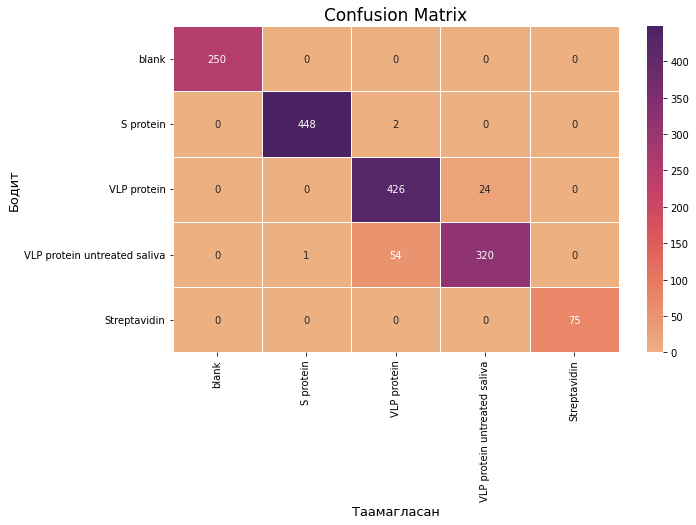

In [143]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

category_labels = diagnosis_map.values()
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.heatmap(cm, 
            ax=ax,
            annot=True,
            cmap="flare",
            linewidth=.5,
            fmt='g', 
            xticklabels=category_labels,
            yticklabels=category_labels)
plt.xlabel('Таамагласан',fontsize=13)
plt.ylabel('Бодит',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

# plt.savefig('../../figures/CM_mult_clf_CNN01_e100_2024_Winter.png', dpi=300, bbox_inches='tight', transparent=True) # PPT
plt.show()

In [155]:
def clf_NN(X_train, X_test, y_train, y_test, num_classes=5, num_epochs=500):
    model = Sequential([
        Dense(100, activation='relu'),
        BatchNormalization(),
        
        Dense(32, activation='relu'),
        BatchNormalization(),

        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.0002)

    model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []
    for i in range(num_epochs):
        history = model.fit(X_train, y_train, epochs=1, batch_size=8, verbose=0)
        
        train_loss.append(history.history['loss'][0])
        train_accuracy.append(history.history['accuracy'][0])

        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        test_loss.append(loss)
        test_accuracy.append(accuracy)
        if (i + 1) % 5 == 0:
            print(f'Epoch {i+1} => Test Loss: {loss:.2f} - Test Accuracy: {accuracy*100:.2f}%')

        if (i + 1) % 50 == 0:
            plt.figure(figsize=(15, 8))
            plt.plot(train_loss, label='train_loss')
            plt.plot(train_accuracy, label='train_accuracy')
            plt.plot(test_loss, label='test_loss')
            plt.plot(test_accuracy, label='test_accuracy')
            plt.title('Model accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            # plt.ylim(0, 1)
            plt.legend(loc='upper left')
            plt.savefig(f'../../figures/simple_nn/mult_clf_epoch_{i}.png', )
            plt.close()

            y_pred = model.predict(X_test)
            cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

            category_labels = diagnosis_map.values()
            fig, ax = plt.subplots(figsize=(10, 6)) 
            sns.heatmap(cm, 
                        ax=ax,
                        annot=True,
                        cmap="flare",
                        linewidth=.5,
                        fmt='g', 
                        xticklabels=category_labels,
                        yticklabels=category_labels)
            plt.xlabel('Таамагласан',fontsize=13)
            plt.ylabel('Бодит',fontsize=13)
            plt.title('Confusion Matrix',fontsize=17)

            plt.savefig(f'../../figures/CM/mult_clf_simpleNN_epoch{i}.png', dpi=300, bbox_inches='tight', transparent=True)
            plt.close()
    return model

In [157]:
model_clf = clf_NN(X_train, X_test, y_train, y_test)

Epoch 5 => Test Loss: 0.12 - Test Accuracy: 95.50%
Epoch 10 => Test Loss: 0.12 - Test Accuracy: 95.69%
Epoch 15 => Test Loss: 0.16 - Test Accuracy: 95.63%
Epoch 20 => Test Loss: 0.22 - Test Accuracy: 95.94%
Epoch 25 => Test Loss: 0.27 - Test Accuracy: 95.50%
Epoch 30 => Test Loss: 0.26 - Test Accuracy: 95.81%
Epoch 35 => Test Loss: 0.25 - Test Accuracy: 96.06%
Epoch 40 => Test Loss: 0.35 - Test Accuracy: 95.63%
Epoch 45 => Test Loss: 0.45 - Test Accuracy: 95.63%
Epoch 50 => Test Loss: 0.45 - Test Accuracy: 96.00%
50/50 [==============================] - 0s 2ms/step
Epoch 55 => Test Loss: 0.47 - Test Accuracy: 95.88%
Epoch 60 => Test Loss: 0.47 - Test Accuracy: 95.44%
Epoch 65 => Test Loss: 0.47 - Test Accuracy: 95.56%
Epoch 70 => Test Loss: 0.58 - Test Accuracy: 96.00%
Epoch 75 => Test Loss: 0.59 - Test Accuracy: 95.63%
Epoch 80 => Test Loss: 0.58 - Test Accuracy: 95.81%
Epoch 85 => Test Loss: 0.60 - Test Accuracy: 95.81%
Epoch 90 => Test Loss: 0.54 - Test Accuracy: 95.69%
Epoch 95 => 

In [152]:
y_pred = model_clf.predict(X_test)

50/50 [==============================] - 0s 2ms/step


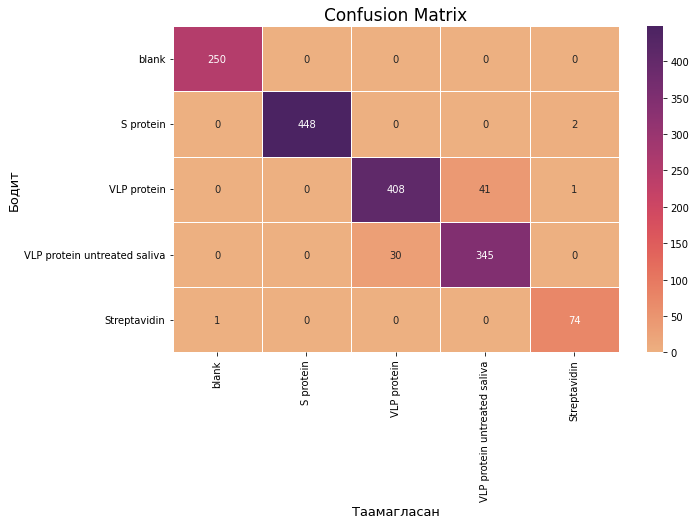

In [154]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

category_labels = diagnosis_map.values()
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.heatmap(cm, 
            ax=ax,
            annot=True,
            cmap="flare",
            linewidth=.5,
            fmt='g', 
            xticklabels=category_labels,
            yticklabels=category_labels)
plt.xlabel('Таамагласан',fontsize=13)
plt.ylabel('Бодит',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

# plt.savefig('../../figures/CM_mult_clf_NN03_e10_2024_Winter.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

## Дүгнэлт